In [1]:
import os
import glob
import numpy as np
import awkward

In [2]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
# import matplotlib
# %matplotlib inline
# import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [5]:
# taken from the file_processor outputs -- update if needed
presel_eff = {1: 0.9840214199343582, 10: 0.993525558985169, 100: 0.9963092463092463, 1000: 0.9953046798410815, 0: 0.03833032309853502}

In [6]:
#sig_filelist = glob.glob('/home/pmasterson/ParticleNet/LDMX-scripts/GraphNet/plot_data/v12_lazy_2region/*1.0*.parquet')
# NOTE:  Used to use output_OUTPUT.parquet for signal
sig_filelist   = glob.glob('/home/pmasterson/ParticleNet/LDMX-scripts/GraphNet/plot_data/v13_1r/v13_1*.parquet') + \
                 glob.glob('/home/pmasterson/ParticleNet/LDMX-scripts/GraphNet/plot_data/v13_1r/v13_0*.parquet')
bkg_filelist   = glob.glob('/home/pmasterson/ParticleNet/LDMX-scripts/GraphNet/plot_data/v13_1r/*pn*.parquet')
sig_filelist_b = glob.glob('/home/pmasterson/ParticleNet/LDMX-scripts/GraphNet/plot_data/v13_2r/v13_1*.parquet') + \
                 glob.glob('/home/pmasterson/ParticleNet/LDMX-scripts/GraphNet/plot_data/v13_2r/v13_0*.parquet')
bkg_filelist_b = glob.glob('/home/pmasterson/ParticleNet/LDMX-scripts/GraphNet/plot_data/v13_2r/*pn*.parquet')
sig_filelist_c = glob.glob('/home/pmasterson/ParticleNet/LDMX-scripts/GraphNet/plot_data/v13_3r/v13_1*.parquet') + \
                 glob.glob('/home/pmasterson/ParticleNet/LDMX-scripts/GraphNet/plot_data/v13_3r/v13_0*.parquet')
bkg_filelist_c = glob.glob('/home/pmasterson/ParticleNet/LDMX-scripts/GraphNet/plot_data/v13_3r/*pn*.parquet')


In [7]:
sig_tables = [awkward.from_parquet(f) for f in sig_filelist]
bkg_tables = [awkward.from_parquet(f) for f in bkg_filelist]
sig_tables_b = [awkward.from_parquet(f) for f in sig_filelist_b]
bkg_tables_b = [awkward.from_parquet(f) for f in bkg_filelist_b]
sig_tables_c = [awkward.from_parquet(f) for f in sig_filelist_c]
bkg_tables_c = [awkward.from_parquet(f) for f in bkg_filelist_c]
"""print("Loaded")
print("sig_tables:")
print(awkward.type(sig_tables[0]))
print("bkg_tables:")
print(awkward.type(bkg_tables[0]))
print("Found {} bkg files".format(len(bkg_tables)))

sig_table = sig_tables[0]['ParticleNet_disc']
sig_class = sig_tables[0]['ParticleNet_extra_label']
sig_distr = [sig_table[i] for i in range(len(sig_table)) if sig_class[i] == 1000]
bkg_table = bkg_tables[0]['ParticleNet_disc']
bkg_distr = [bkg_table[i] for i in range(len(bkg_table))]
print("Arrs ready")
# Plot discValue distr, just to check...
#bins = np.linspace(0.996, 0.998, 100)
bins = np.linspace(0, 1, 100)
plt.figure()
plt.hist(sig_distr, bins=bins, density=True, histtype='step', label="sig")
plt.hist(bkg_distr, bins=bins, density=True, histtype='step', label="bkg")
#plt.xlim((0.996,0.998))
plt.xlabel("PN score")
plt.semilogy()
plt.legend(loc=1)
plt.title("PN score for 1.0 GeV")
plt.show()
print(sig_tables[0]['ParticleNet_disc'])"""

'print("Loaded")\nprint("sig_tables:")\nprint(awkward.type(sig_tables[0]))\nprint("bkg_tables:")\nprint(awkward.type(bkg_tables[0]))\nprint("Found {} bkg files".format(len(bkg_tables)))\n\nsig_table = sig_tables[0][\'ParticleNet_disc\']\nsig_class = sig_tables[0][\'ParticleNet_extra_label\']\nsig_distr = [sig_table[i] for i in range(len(sig_table)) if sig_class[i] == 1000]\nbkg_table = bkg_tables[0][\'ParticleNet_disc\']\nbkg_distr = [bkg_table[i] for i in range(len(bkg_table))]\nprint("Arrs ready")\n# Plot discValue distr, just to check...\n#bins = np.linspace(0.996, 0.998, 100)\nbins = np.linspace(0, 1, 100)\nplt.figure()\nplt.hist(sig_distr, bins=bins, density=True, histtype=\'step\', label="sig")\nplt.hist(bkg_distr, bins=bins, density=True, histtype=\'step\', label="bkg")\n#plt.xlim((0.996,0.998))\nplt.xlabel("PN score")\nplt.semilogy()\nplt.legend(loc=1)\nplt.title("PN score for 1.0 GeV")\nplt.show()\nprint(sig_tables[0][\'ParticleNet_disc\'])'

In [8]:
load_branches = [
    'discValue_',
    'recoilX_',
    'recoilY_',
    
    'ParticleNet_extra_label',
    'ParticleNet_disc',
    'TargetSPRecoilE_pt', # use this for plotting: this is the recoil electron pT at TargetSP
]

In [9]:
"""
a = {}
for k in load_branches:
    print("Loading "+k)
    arrs = []
    for tab in sig_tables + bkg_tables:
        #print(awkward.type(tab))
        #print(tab)
        #print(tab['TargetSPRecoilE_pt'])
        #print(awkward.fields(tab))
        arr = tab[k] if k in awkward.fields(tab) else np.zeros_like(tab['ParticleNet_disc'])
        arrs.append(arr)
    a[k] = awkward.concatenate(arrs)
    #if k.startswith('EcalVeto'):
    #    #a[k] = a[k].regular()
    #    a[k] = awkward.to_regular(a[k])
    if a[k].ndim==2 and len(a[k][0]) == 1:  #a[k].shape[1]==1:
        a[k] = a[k][:,0]
    #print("   Found {} events".format(len(a[k])))

"""
def load_dict(sig_tables, bkg_tables):
    a = {}
    for k in load_branches:
        #print("Loading "+k)
        arrs = []
        for tab in sig_tables + bkg_tables:
            #print(awkward.type(tab))
            #print(tab)
            #print(tab['TargetSPRecoilE_pt'])
            #print(awkward.fields(tab))
            arr = tab[k] if k in awkward.fields(tab) else np.zeros_like(tab['ParticleNet_disc'])
            arrs.append(arr)
        a[k] = awkward.concatenate(arrs)
        if k.startswith('EcalVeto'):
            #a[k] = a[k].regular()
            a[k] = awkward.to_regular(a[k])
            if a[k].ndim==2 and len(a[k][0]) == 1:  #a[k].shape[1]==1:
                a[k] = a[k][:,0]
        print("   Found {} events".format(len(a[k])))
    return a

a = load_dict(sig_tables, bkg_tables)
b = load_dict(sig_tables_b, bkg_tables_b)
c = load_dict(sig_tables_c, bkg_tables_c)

#t_extra_labels = a['ParticleNet_extra_label']
#print("TESTING")
#print(a['TargetSPRecoilE_pt'][:100])
#print("DONE")
"""p_rec = a['EcalVeto_v12.recoilX_']
#NEW for finding frac of missing-e events
for k in presel_eff:  #Find the fraction of missing-e events for each signal category
    n_events=0
    n_missing_e=0
    for i in range(len(p_rec)):
        if t_extra_labels[i] == k:
            n_events += 1
            #if i<100:  print(p_rec[i])
            if p_rec[i] == -9999:  n_missing_e += 1
    print("Found", n_events, "events for", k, "MeV")
    print("Fraction of events w/ missing electron for "+str(k)+" MeV is ", str(n_missing_e/n_events))"""
print("Done")

#print(a['ParticleNet_disc'][:3])
#print(a['discValue_'][:3])

   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
   Found 205454 events
Done


In [10]:
#NEW:  Remove all hits with/without recoilX_==-999 (or -9999?) (or Y)
"""ntotal = len(a['EcalVeto_v12.recoilX_'])
mask = a['EcalVeto_v12.recoilX_'] != -9999
#print(mask[:50])
for k in load_branches:
    a[k] = a[k][mask]
print("Fraction of events remaining (without missing electron):", len(a[load_branches[0]])/len(mask))"""

#Examine missing electrons in each category:
#NOTE:  uncertain how bkg_tables, etc are structured...
#print(sig_tables[0])

'ntotal = len(a[\'EcalVeto_v12.recoilX_\'])\nmask = a[\'EcalVeto_v12.recoilX_\'] != -9999\n#print(mask[:50])\nfor k in load_branches:\n    a[k] = a[k][mask]\nprint("Fraction of events remaining (without missing electron):", len(a[load_branches[0]])/len(mask))'

In [11]:
for k in a.keys():
    print(k, awkward.type(a[k]))
    #NOTE:  elements of dict are just np arrays
    #So...it should be possible to sift everything accordingly.
    
# Full size:  3395546
# Ehit size:  2789329
# Missing e size:  606217 -> Sizes are all consistent

discValue_ 205454 * var * float64
recoilX_ 205454 * var * float64
recoilY_ 205454 * var * float64
ParticleNet_extra_label 205454 * int64
ParticleNet_disc 205454 * float32
TargetSPRecoilE_pt 205454 * var * float64


In [21]:
def to_categorical(y, num_classes=None):
    """Converts a class vector (integers) to binary class matrix.
    E.g. for use with categorical_crossentropy.
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
    # Returns
        A binary matrix representation of the input.
    """
    y = np.array(y, dtype='int').ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype='int')
    categorical[np.arange(n), y] = 1
    return categorical


def plotROC(y_preds, y_truth, sample_weight=None, output=None, labels=['signal'], sig_eff=1, bkg_eff=1, energy=0, **kwargs):
    from sklearn.metrics import auc, roc_curve, accuracy_score

    fpr = dict()
    tpr = dict()
    thresholds= dict()
    roc_auc = dict()
    outputs = {}

    plt.figure()

    for label, pred in zip(labels, y_preds):
        print("Label: ", label)
        fpr[label], tpr[label], thresholds[label] = roc_curve(y_truth, pred, sample_weight=sample_weight)
        roc_auc[label] = auc(fpr[label], tpr[label])
        fpr[label] *= bkg_eff
        tpr[label] *= sig_eff

        legend = '%s (auc* = %0.6f)' % (label, roc_auc[label])
        print(legend)
        eff = get_signal_effs(fpr[label], tpr[label], thresholds[label])
        outputs[label] = eff
        print(eff)
        plt.plot(fpr[label], tpr[label], label=legend)
#     plt.plot([0, 1], [1, 0], 'k--')
    plt.xlim(kwargs.get('xlim', [0, 1]))
    plt.ylim(kwargs.get('ylim', [0, 1]))
    plt.xlabel('False positive rate ($\epsilon_{B}$)')
    plt.ylabel('True positive rate ($\epsilon_{S}$)')
#     plt.title('Receiver operating characteristic example')
    plt.legend(loc='best')
    if kwargs.get('logy', False):
        plt.yscale('log')
    if kwargs.get('logx', False):
        plt.xscale('log')
    plt.grid()
    # TEMPORARY TITLE
    plt.title(str(k)+" MeV", fontdict = {'fontsize' : 15})
    #plt.title("All events, "+str(k)+" MeV", fontdict = {'fontsize' : 15})
    if output:
        plt.savefig(output)
#     return {'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds}
    return outputs


def plotROC_multi(y_preds_, y_truth_, sample_weight_=None, output=None, labels=['signal'], sig_eff=1, bkg_eff=1, energy=0, **kwargs):
    from sklearn.metrics import auc, roc_curve, accuracy_score

    # y_preds, etc are now tuples of (a, b, c) (1reg, 2reg, 3reg)
    plt.figure()
    
    for i in range(3):  # 1, 2, 3 regions
        
        fpr = dict()
        tpr = dict()
        thresholds= dict()
        roc_auc = dict()
        outputs = {}

        #plt.figure()

        y_preds = y_preds_[i]
        y_truth = y_truth_[i]
        sample_weight = sample_weight_[i]
        print("Y_TRUTH:")
        print(y_truth[:10])
        for label, pred in zip(labels, y_preds):
            if label == 'BDT' and i < 2:  continue
            print("Label: ", label)
            fpr[label], tpr[label], thresholds[label] = roc_curve(y_truth, pred, sample_weight=sample_weight)
            roc_auc[label] = auc(fpr[label], tpr[label])
            fpr[label] *= bkg_eff
            tpr[label] *= sig_eff
            
            if label == 'BDT':
                legend = '%s (auc* = %0.6f)' % (label, roc_auc[label])
            else:
                legend = '%i-reg %s, PN (auc* = %0.6f)' % (i+1, label, roc_auc[label])
            print(legend)
            eff = get_signal_effs(fpr[label], tpr[label], thresholds[label])
            outputs[label] = eff
            #print(eff)
            print(tpr[label][:10])
            print(len(fpr[label]))
            plt.plot(fpr[label], tpr[label], label=legend)
#     plt.plot([0, 1], [1, 0], 'k--')
    plt.xlim(kwargs.get('xlim', [0, 1]))
    plt.ylim(kwargs.get('ylim', [0, 1]))
    plt.xlabel('False positive rate ($\epsilon_{B}$)')
    plt.ylabel('True positive rate ($\epsilon_{S}$)')
#     plt.title('Receiver operating characteristic example')
    plt.legend(loc='best')
    if kwargs.get('logy', False):
        plt.yscale('log')
    if kwargs.get('logx', False):
        plt.xscale('log')
    plt.grid()
    # TEMPORARY TITLE
    plt.title(str(k)+" MeV", fontdict = {'fontsize' : 15})
    #plt.title("All events, "+str(k)+" MeV", fontdict = {'fontsize' : 15})
    if output:
        plt.savefig(output)
#     return {'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds}
    return outputs


mistags=[1e-3, 1e-4, 1e-5, 1e-6]
def get_signal_effs(fpr, tpr, thresholds, mistags=mistags):
    outputs = []
    for m in mistags:
        idx = next(idx for idx, v in enumerate(fpr) if v > m)
        outputs.append((fpr[idx], tpr[idx], thresholds[idx]))
    return outputs


In [22]:
test_extra_labels = a['ParticleNet_extra_label']
test_labels = test_extra_labels>0
test_extra_labels_b = b['ParticleNet_extra_label']
test_labels_b = test_extra_labels_b>0
test_extra_labels_c = c['ParticleNet_extra_label']
test_labels_c = test_extra_labels_c>0
#print(test_labels_b[-20:])
print(len(test_extra_labels))
print(test_extra_labels[-20:])
"""
print(sum([test_extra_labels[i]==0 for i in range(len(test_extra_labels))]))
ind = 0
while test_extra_labels[ind] == 0:
    ind += 1

print(a['discValue_'][ind])
print(a['recoilX_'][ind])


temp = a['ParticleNet_disc']
temp_ = [it[0] for it in a['discValue_']]  # a = list:  [[a], [b], etc.]
print(temp[:10])
print(temp_[:10])

bins = np.linspace(0, 1.0, 100)

PN = []
EV = []
for i in range(len(temp_)):
    if test_extra_labels[i] == 0:  # 0, or 10, or...
        #print(temp[i])
        PN.append(temp[i])
        EV.append(temp_[i])
        #if temp_[i] > 1.0 - 1e-6 and temp_[i] < 1.0:
        #    print("LESS")
        #    print(temp[i])
        #if temp[i] == 1.0:  print(1)
plt.figure()
plt.hist(PN, bins=bins, histtype='step', color='b')
plt.hist(EV, bins=bins, histtype='step', color='r')
plt.semilogy()
plt.show()"""

205454
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'\nprint(sum([test_extra_labels[i]==0 for i in range(len(test_extra_labels))]))\nind = 0\nwhile test_extra_labels[ind] == 0:\n    ind += 1\n\nprint(a[\'discValue_\'][ind])\nprint(a[\'recoilX_\'][ind])\n\n\ntemp = a[\'ParticleNet_disc\']\ntemp_ = [it[0] for it in a[\'discValue_\']]  # a = list:  [[a], [b], etc.]\nprint(temp[:10])\nprint(temp_[:10])\n\nbins = np.linspace(0, 1.0, 100)\n\nPN = []\nEV = []\nfor i in range(len(temp_)):\n    if test_extra_labels[i] == 0:  # 0, or 10, or...\n        #print(temp[i])\n        PN.append(temp[i])\n        EV.append(temp_[i])\n        #if temp_[i] > 1.0 - 1e-6 and temp_[i] < 1.0:\n        #    print("LESS")\n        #    print(temp[i])\n        #if temp[i] == 1.0:  print(1)\nplt.figure()\nplt.hist(PN, bins=bins, histtype=\'step\', color=\'b\')\nplt.hist(EV, bins=bins, histtype=\'step\', color=\'r\')\nplt.semilogy()\nplt.show()'

1 MeV
<class 'list'>


<IPython.core.display.Javascript object>


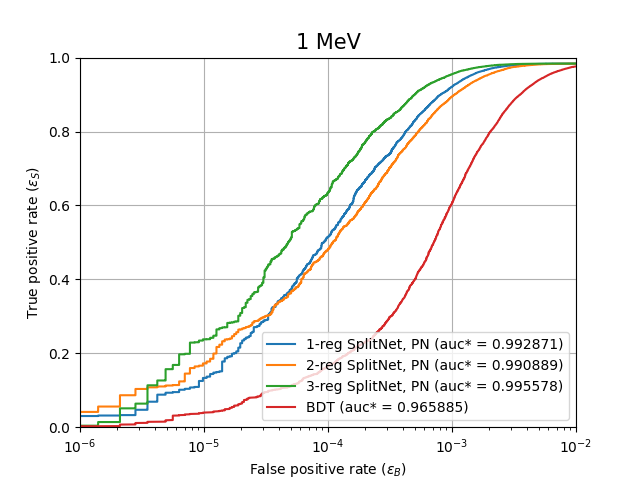

Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
1-reg SplitNet, PN (auc* = 0.992871)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.26795755e-05
 2.26795755e-05 4.53591509e-05 4.53591509e-05 6.80387264e-05
 6.80387264e-05 9.07183018e-05]
51556
Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
2-reg SplitNet, PN (auc* = 0.990889)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.26795755e-05
 2.26795755e-05 4.53591509e-05 4.53591509e-05 6.80387264e-05
 6.80387264e-05 9.07183018e-05]
57481
Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
3-reg SplitNet, PN (auc* = 0.995578)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.26795755e-05
 2.26795755e-05 4.53591509e-05 4.53591509e-05 6.80387264e-05
 6.80387264e-05 9.07183018e-05]
51420
Label:  BDT
BDT (auc* = 0.965885)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.53591509e-05
 1.81436604e-04 2.04116179e-04 2.72154905e-04 3.85552

<IPython.core.display.Javascript object>


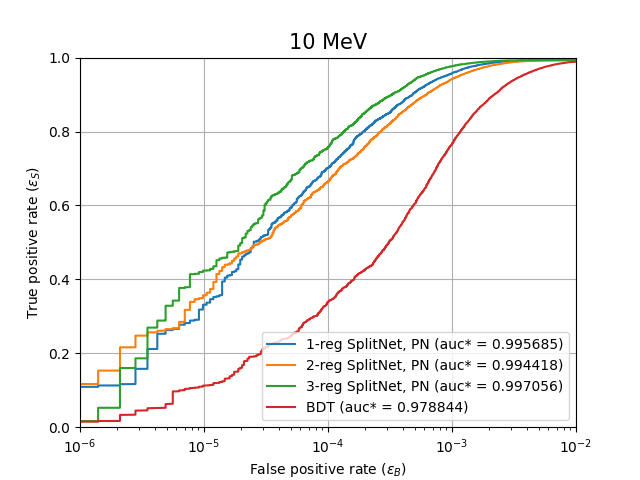

Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
1-reg SplitNet, PN (auc* = 0.995685)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.60126082e-05
 2.60126082e-05 5.20252165e-05 5.20252165e-05 1.04050433e-04
 1.04050433e-04 1.30063041e-04]
57704
Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
2-reg SplitNet, PN (auc* = 0.994418)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.60126082e-05
 2.60126082e-05 5.20252165e-05 5.20252165e-05 7.80378247e-05
 7.80378247e-05 1.04050433e-04]
60452
Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
3-reg SplitNet, PN (auc* = 0.997056)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.60126082e-05
 2.60126082e-05 5.20252165e-05 5.20252165e-05 7.80378247e-05
 7.80378247e-05 1.04050433e-04]
55134
Label:  BDT
BDT (auc* = 0.978844)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.60126082e-05
 5.98289989e-04 1.30063041e-03 1.35265563e-03 1.89892

<IPython.core.display.Javascript object>


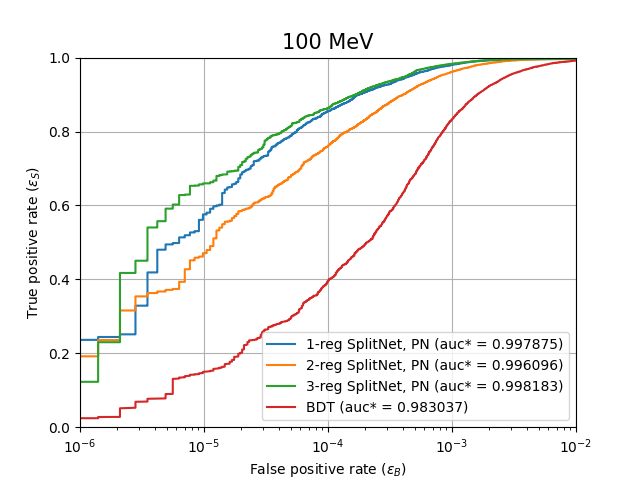

Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
1-reg SplitNet, PN (auc* = 0.997875)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.55476477e-05
 4.55476477e-05 9.10952954e-05 9.10952954e-05 1.36642943e-04
 1.36642943e-04 1.82190591e-04]
41396
Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
2-reg SplitNet, PN (auc* = 0.996096)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.55476477e-05
 4.55476477e-05 9.10952954e-05 9.10952954e-05 1.36642943e-04
 1.36642943e-04 1.82190591e-04]
43509
Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
3-reg SplitNet, PN (auc* = 0.998183)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.55476477e-05
 4.55476477e-05 9.10952954e-05 9.10952954e-05 1.36642943e-04
 1.36642943e-04 1.82190591e-04]
40618
Label:  BDT
BDT (auc* = 0.983037)
[0.         0.         0.         0.00113869 0.00232293 0.00241403
 0.00318834 0.00491915 0.005739   0.00619448]
3

<IPython.core.display.Javascript object>


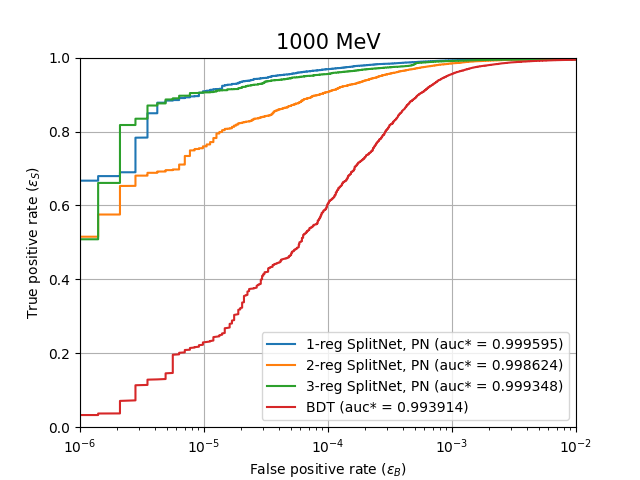

Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
1-reg SplitNet, PN (auc* = 0.999595)
[0.00000000e+00 2.10637577e-05 4.21275154e-05 4.21275154e-05
 6.31912732e-05 6.31912732e-05 1.26382546e-04 1.26382546e-04
 1.47446304e-04 1.47446304e-04]
43575
Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
2-reg SplitNet, PN (auc* = 0.998624)
[0.         0.         0.00092681 0.00096893 0.00115851 0.00115851
 0.00183255 0.00183255 0.00358084 0.00362297]
53106
Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
3-reg SplitNet, PN (auc* = 0.999348)
[0.00000000e+00 0.00000000e+00 4.21275154e-05 4.21275154e-05
 1.26382546e-03 1.30595298e-03 1.62190934e-03 1.66403686e-03
 1.91680195e-03 1.95892947e-03]
41030
Label:  BDT
BDT (auc* = 0.993914)
[0.00000000e+00 2.10637577e-05 1.05318789e-04 1.05318789e-04
 1.26382546e-03 2.44339590e-03 2.54871468e-03 3.45445627e-03
 5.62402331e-03 6.76146623e-03]
3

In [23]:
"""
roc_info = {}
for k in presel_eff:
    if k > 0:
        mass = '%d MeV' % k
        print(mass)
        roc_info[k] = plotROC([a['ParticleNet_disc'], a['discValue_']], test_labels, 
                sample_weight=np.logical_or(test_extra_labels == 0, test_extra_labels == k),
                sig_eff=presel_eff[k], bkg_eff=presel_eff[0],
                labels=['SplitNet', 'BDT'], xlim=[1e-6, .01], ylim=[0, 1], logx=True, energy=k)
        #**NOTE:**  The sample_weight line is critical!!  Selects only bkg+sig[k].
"""
roc_info = {}
y_preds_ = [[a['ParticleNet_disc'], a['discValue_']], [b['ParticleNet_disc'], b['discValue_']], [c['ParticleNet_disc'], c['discValue_']]]
#y_preds_ = [[a['ParticleNet_disc'], a['discValue_']], [b['ParticleNet_disc'], b['discValue_']]]
test_labels_ = [test_labels, test_labels_b, test_labels_c]
#print(a['ParticleNet_disc'][:10])
for k in presel_eff:
    if k > 0:
        mass = '%d MeV' % k
        print(mass)
        weights = [np.logical_or(test_extra_labels==0, test_extra_labels==k),
                  np.logical_or(test_extra_labels_b==0, test_extra_labels_b==k),
                  np.logical_or(test_extra_labels_c==0, test_extra_labels_c==k)]
        print(type(weights))
        roc_info[k] = plotROC_multi(y_preds_, test_labels_, 
                sample_weight_=weights,
                sig_eff=presel_eff[k], bkg_eff=presel_eff[0],
                labels=['SplitNet', 'BDT'], xlim=[1e-6, .01], ylim=[0, 1], logx=True, energy=k)
# NOTE:  add 'BDT' to labels list if desired

In [24]:
roc_info

{1: {'SplitNet': [(0.001000512032071869, 0.9550369225001343, 0.6467264),
   (0.0001001212180449806, 0.6340982502061566, 0.8669618),
   (1.050222566905391e-05, 0.23770463036627656, 0.9301148),
   (1.4002967558738544e-06, 0.004059644006827927, 0.98309165)],
  'BDT': [(0.001000512032071869, 0.6051137527719326, 0.9961104989051819),
   (0.0001001212180449806, 0.1655155416862023, 0.9998999834060669),
   (1.050222566905391e-05, 0.039734616200907985, 0.999968409538269),
   (1.4002967558738544e-06, 0.0023813554229996222, 0.9999867677688599)]},
 10: {'SplitNet': [(0.001000512032071869, 0.9766173636314391, 0.6467264),
   (0.0001001212180449806, 0.7568888618576599, 0.8669618),
   (1.050222566905391e-05, 0.4237193755644713, 0.9301148),
   (1.4002967558738544e-06, 0.01646598101370927, 0.98309165)],
  'BDT': [(0.001000512032071869, 0.7657331486580724, 0.9961104989051819),
   (0.0001001212180449806, 0.3384240331569631, 0.9998999834060669),
   (1.050222566905391e-05, 0.11286870713820622, 0.999968409538

In [25]:
plot_bins = {
#     'EcalVetoGabriel_recon.nReadoutHits_':np.linspace(0, 50, 51),
#     'EcalVetoGabriel_recon.deepestLayerHit_':np.linspace(0, 35, 36),
#     'EcalVetoGabriel_recon.summedDet_':np.linspace(0, 2000, 41),
#     'EcalVetoGabriel_recon.summedTightIso_':np.linspace(0, 400, 41),
#     'EcalVetoGabriel_recon.maxCellDep_':np.linspace(0, 400, 41),
#     'EcalVetoGabriel_recon.showerRMS_':np.linspace(0, 250, 26),
#     'EcalVetoGabriel_recon.xStd_':np.linspace(0, 200, 41),
#     'EcalVetoGabriel_recon.yStd_':np.linspace(0, 200, 41),
#     'EcalVetoGabriel_recon.avgLayerHit_':np.linspace(0, 35, 36),
#     'EcalVetoGabriel_recon.stdLayerHit_':np.linspace(0, 20, 21),
#     'EcalVetoGabriel_recon.ecalBackEnergy_':np.linspace(0, 200, 41),
# #     'EcalVetoGabriel_recon.discValue_':np.linspace(0.9, 1, 51),
#     'EcalVetoGabriel_recon.recoilX_':np.linspace(-400, 400, 81),
#     'EcalVetoGabriel_recon.recoilY_':np.linspace(-400, 400, 81),

    'TargetSPRecoilE_pt':np.linspace(-50, 200, 51),

#     'ParticleNet_disc':np.linspace(0, 1, 51),
}

# plot_bins = {
#     'EcalVetoGabriel_recon.ecalLayerEdepReadout_:%d'%i:np.linspace(0, 1000, 51) for i in range(34)
# }


In [26]:
colors = ['#636363', '#74c476', '#3182bd', '#f03b20', '#bd0026']
colors = None


In [43]:
def plot_sig_vs_bkg(var_name):
    if ':' in var_name:
        var, var_idx = var_name.split(':')
        var_idx = int(var_idx)
    else:
        var, var_idx = var_name, None

    arrays = []
    labels = []
    for proc in presel_eff.keys():
        pos = test_extra_labels==proc
        arr = a[var][pos]
        #print("awk", awkward.type(arr))
        #print(arr[:3])
        # NEW:  See if direct awkward conversion works
        arr = awkward.to_numpy(arr, allow_missing=True)[:,0]
        #print("Before clip,", arr.shape)
        if var_idx:
            arr = arr[:, var_idx]
        if not isinstance(plot_bins[var_name], int):
            arr = np.clip(arr, min(plot_bins[var_name]), max(plot_bins[var_name]))
        arrays.append(arr)
        labels.append('BKG' if proc==0 else '%d MeV'%proc)
    f = plt.figure()
    #TEMP TITLE
    #plt.title("Events without SP hit")
    plt.title("All events")
    #NOTE:  normed=True caused an error; removing it temporarily
    #print("shape", arrays[0][:,0].shape)
    plt.hist(arrays, bins=plot_bins[var_name], label=labels, histtype='step', log=True)
    plt.legend()
    plt.xlabel(var_name)

In [44]:
# plot_sig_vs_bkg('TargetSPRecoilE_pt')

TargetSPRecoilE_pt


<IPython.core.display.Javascript object>


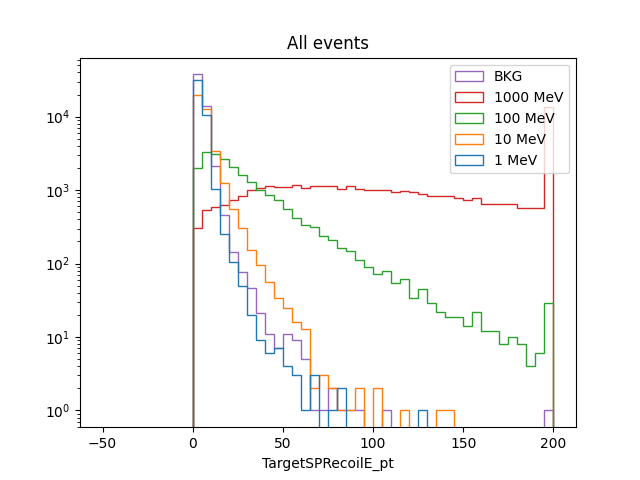

In [45]:
for var in plot_bins:
    print(var)
    plot_sig_vs_bkg(var)

In [67]:
def plot_trend(var_name, proc, eff_levels=None, mistag_levels=[1e-3, 1e-4, 1e-5, 1e-6]):
    if ':' in var_name:
        var, var_idx = var_name.split(':')
        var_idx = int(var_idx)
    else:
        var, var_idx = var_name, None
    if eff_levels is None and mistag_levels is None:
        eff_levels = [1e-3, 1e-4, 1e-5, 1e-6] if proc==0 else [0.9, 0.7, 0.5, 0.2]
    f, axes = plt.subplots(1, 2, figsize=(12, 5))
    f.suptitle('%d MeV'%proc if proc>0 else 'BKG', fontsize=16)
    pos0 = test_extra_labels==proc
    #a_tmp = {k:a[k][pos0] for k in ('ParticleNet_disc', 'EcalVetoGabriel_recon.discValue_', var)}
    # TESTING CONVERSION:
    #a_tmp = {k:np.array(a[k][pos0]) for k in ('ParticleNet_disc', 'EcalVeto_v12.discValue_', var)}
    
    # *****NOTE *****  Changed to b/c for multi-region!
    a_tmp = {k:awkward.to_numpy(c[k][pos0], allow_missing=True) for k in ('ParticleNet_disc', 'discValue_', var)}
    if var_idx:
        a_tmp[var] = a_tmp[var][:, var_idx]
    # NEW:  Ratio plot testing
    ratio_arrs = []  # PN_disc, ECal.disc
    for i, k in enumerate(['ParticleNet_disc', 'discValue_']):
        arrs = []
        labels = []
        scores = a_tmp[k]
        if mistag_levels is None:  #NOTE:  Currently modifying this to produce fixed bkg efficiencies...
            #Changing presel_eff[proc] to 1 (Warning:  bkg will be messed up)
            pcts = (1 - np.array(eff_levels)/presel_eff[1]) * 100.
            print('effs=', pcts)
            thresholds = [-99] + list(np.percentile(scores, pcts))
        else:
            thresholds = [-99] + [info[-1] for info in roc_info[1]['SplitNet' if i==0 else 'BDT']]
        print(k, thresholds)
        for idx, thres in enumerate(thresholds):
            pos = scores>thres
#             print(k, thres, pos.sum())
            print(a_tmp[var_name].shape)
            if len(a_tmp[var][pos].shape) > 1:
                if not isinstance(plot_bins[var_name], int):
                    #print(a_tmp[var][pos].shape)
                    arrs.append(np.clip(a_tmp[var][pos][:,0], min(plot_bins[var_name]), max(plot_bins[var_name])))
                else:
                    arrs.append(a_tmp[var][pos][:,0])
                if mistag_levels is None:
                    labels.append('inclusive' if idx==0 else ('$\epsilon_{B}$=%.0e'%eff_levels[idx-1] if proc==0 else '$\epsilon_{S}$=%.1f'%eff_levels[idx-1]))
                else:
                    labels.append('inclusive' if idx==0 else '$\epsilon_{B}$=%.0e'%mistag_levels[idx-1])
            else:
                if not isinstance(plot_bins[var_name], int):
                    arrs.append(np.clip(a_tmp[var][pos], min(plot_bins[var_name]), max(plot_bins[var_name])))
                else:
                    arrs.append(a_tmp[var][pos])
                if mistag_levels is None:
                    labels.append('inclusive' if idx==0 else ('$\epsilon_{B}$=%.0e'%eff_levels[idx-1] if proc==0 else '$\epsilon_{S}$=%.1f'%eff_levels[idx-1]))
                else:
                    labels.append('inclusive' if idx==0 else '$\epsilon_{B}$=%.0e'%mistag_levels[idx-1])

        axes[i].hist(arrs, histtype='step', bins=plot_bins[var_name], density=True, log=True, label=labels, color=colors, linewidth=2)
        axes[i].set_title('ParticleNet' if i==0 else 'BDT')  #, '+str(proc if proc>0 else 'BKG')+' MeV
        axes[i].set_xlabel(var)
        axes[i].set_ylim(1e-6, 30)
        axes[i].legend(loc='best')
        
        ratio_arrs.append(arrs)
    """print(len(ratio_arrs))
    print(len(ratio_arrs[0]))
    print(len(ratio_arrs[0][0]))
    plot_histos_PN = [np.histogram(a, plot_bins[var_name]) for a in ratio_arrs[0]]
    plot_histos_EV = [np.histogram(a, plot_bins[var_name]) for a in ratio_arrs[1]]
    print(len(plot_histos_PN), len(plot_histos_PN[0]))
    print(plot_bins[var_name])
    print(np.histogram(ratio_arrs[0], bins=plot_bins[var_name]))
    plot_histo_ratios = [[a / b for a, b in zip(ah, bh)] for ah, bh in zip(plot_histos_PN, plot_histos_EV)]
    plt_bins_ = [plot_bins[var_name][p] for p in range(len(plot_bins[var_name]-1))]
    plot_bins_ = [plt_bins_ for i in range(len(plot_histos_PN))]
    plt.figure(figsize=(6, 3))
    plt.title('Ratio of PN pT / BDT pT')
    plt.plot(plot_bins_, plot_histo_ratios, label=labels)
    plt.legend(loc='best')
    plt.show()"""

TargetSPRecoilE_pt


<IPython.core.display.Javascript object>


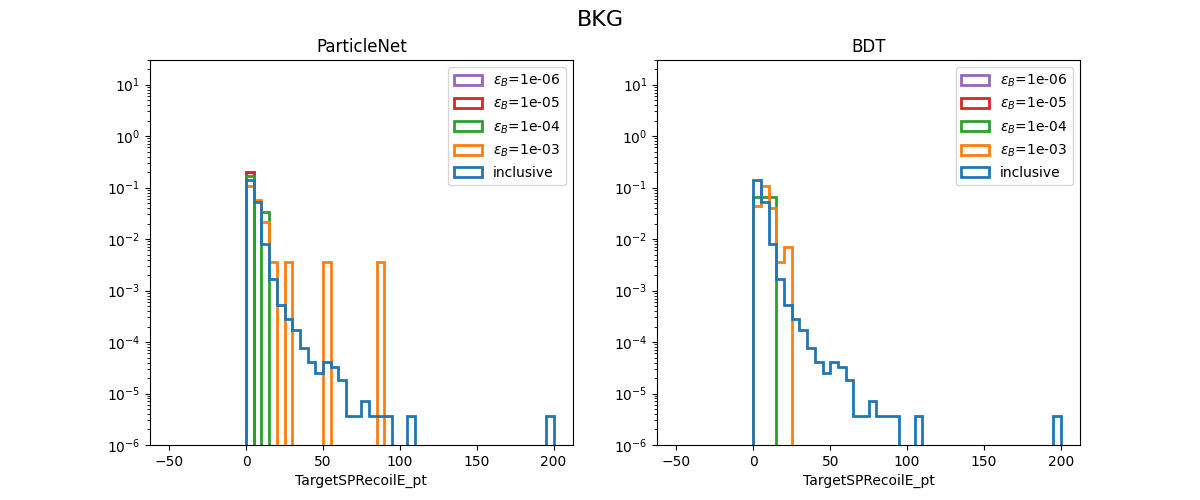

effs= [99.8983762  99.98983762 99.99898376 99.99989838]
ParticleNet_disc [-99, 0.8991414627806098, 0.9449496179185756, 0.9905932180846598, 0.9990593218084045]
(54746, 1)
(54746, 1)
(54746, 1)
(54746, 1)
(54746, 1)
effs= [99.8983762  99.98983762 99.99898376 99.99989838]
discValue_ [-99, 0.9999403197823108, 0.9999779983287865, 0.9999867677688599, 0.9999867677688599]
(54746, 1)
(54746, 1)
(54746, 1)
(54746, 1)
(54746, 1)


/home/pmasterson/miniconda3/envs/torchroot/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<IPython.core.display.Javascript object>


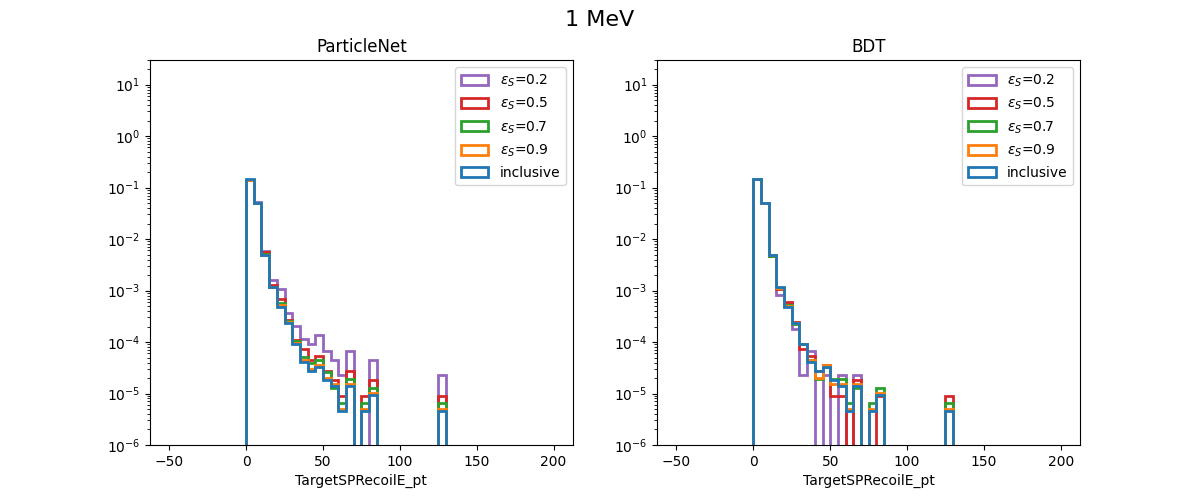

effs= [ 8.53857632 28.86333714 49.18809795 79.67523918]
ParticleNet_disc [-99, 0.7431117152724077, 0.8495144463083506, 0.8930567840105571, 0.9347796363930178]
(43388, 1)
(43388, 1)
(43388, 1)
(43388, 1)
(43388, 1)
effs= [ 8.53857632 28.86333714 49.18809795 79.67523918]
discValue_ [-99, 0.9083745268307168, 0.9911638498306274, 0.9983991074633224, 0.9998659725217669]
(43388, 1)
(43388, 1)
(43388, 1)
(43388, 1)
(43388, 1)


<IPython.core.display.Javascript object>


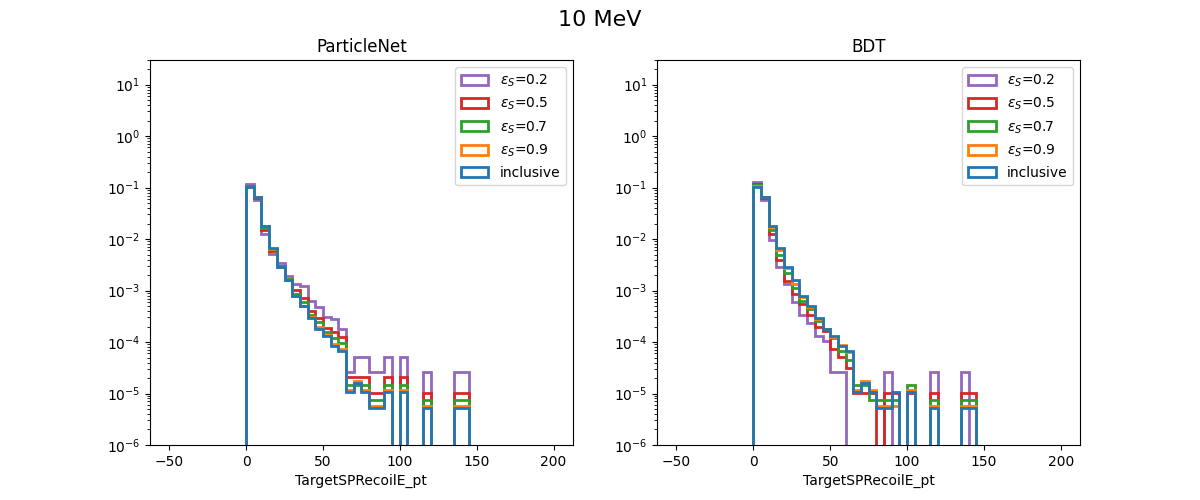

effs= [ 8.53857632 28.86333714 49.18809795 79.67523918]
ParticleNet_disc [-99, 0.7792769958187548, 0.8819061477295417, 0.9201324964170239, 0.9531483821346565]
(38194, 1)
(38194, 1)
(38194, 1)
(38194, 1)
(38194, 1)
effs= [ 8.53857632 28.86333714 49.18809795 79.67523918]
discValue_ [-99, 0.9671310725741963, 0.9980391169153104, 0.9996952307524573, 0.9999483823776245]
(38194, 1)
(38194, 1)
(38194, 1)
(38194, 1)
(38194, 1)


<IPython.core.display.Javascript object>


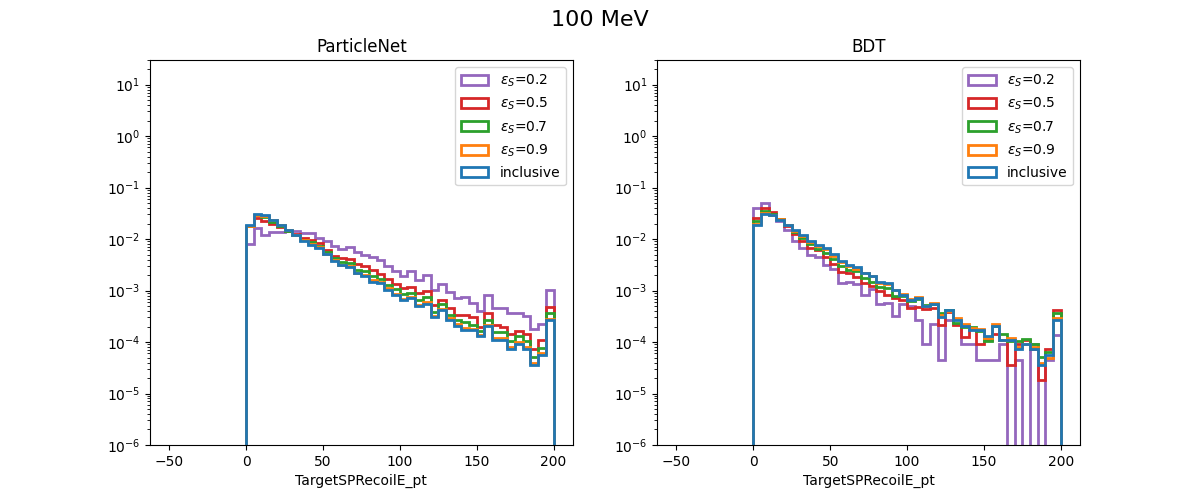

effs= [ 8.53857632 28.86333714 49.18809795 79.67523918]
ParticleNet_disc [-99, 0.8261395408221378, 0.921119927179716, 0.9496336365922178, 0.9753205738222066]
(21874, 1)
(21874, 1)
(21874, 1)
(21874, 1)
(21874, 1)
effs= [ 8.53857632 28.86333714 49.18809795 79.67523918]
discValue_ [-99, 0.9829524095604838, 0.9991002413906981, 0.9998156428337097, 0.9999579191207886]
(21874, 1)
(21874, 1)
(21874, 1)
(21874, 1)
(21874, 1)


<IPython.core.display.Javascript object>


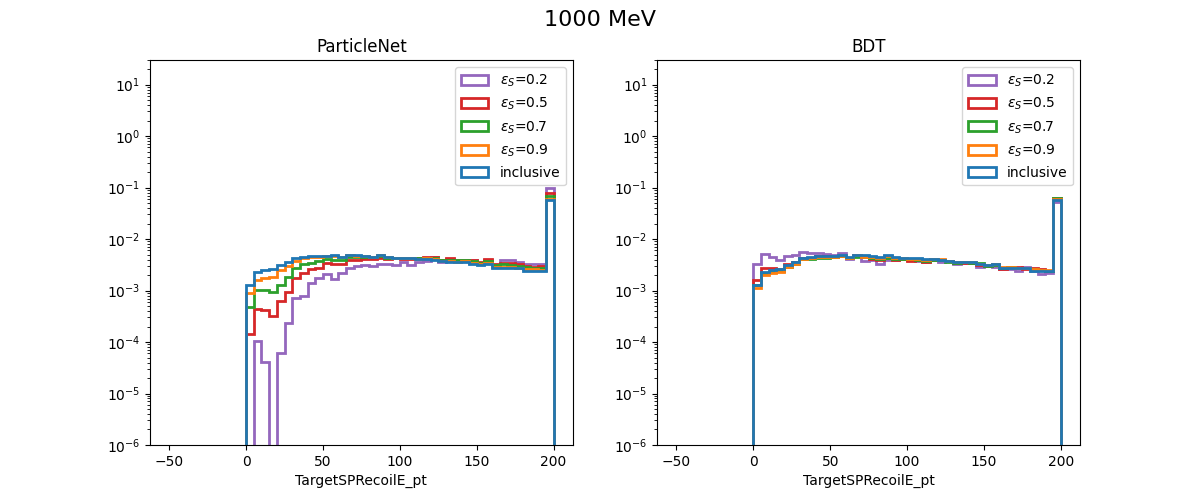

effs= [ 8.53857632 28.86333714 49.18809795 79.67523918]
ParticleNet_disc [-99, 0.9270619021353097, 0.9696934830553338, 0.9832361183362797, 0.9938754903153729]
(47252, 1)
(47252, 1)
(47252, 1)
(47252, 1)
(47252, 1)
effs= [ 8.53857632 28.86333714 49.18809795 79.67523918]
discValue_ [-99, 0.9989603684991297, 0.9998465776443481, 0.9999277591705322, 0.9999713897705078]
(47252, 1)
(47252, 1)
(47252, 1)
(47252, 1)
(47252, 1)


In [68]:
# compare shapes with succesively tighter selections
# keep BKG mistag rate the same for all signal points

for var in plot_bins:
    print(var)
    plot_trend(var, proc=0, mistag_levels=None)
    plot_trend(var, proc=1, mistag_levels=None)
    plot_trend(var, proc=10, mistag_levels=None)
    plot_trend(var, proc=100, mistag_levels=None)
    plot_trend(var, proc=1000, mistag_levels=None)

TargetSPRecoilE_pt


<IPython.core.display.Javascript object>


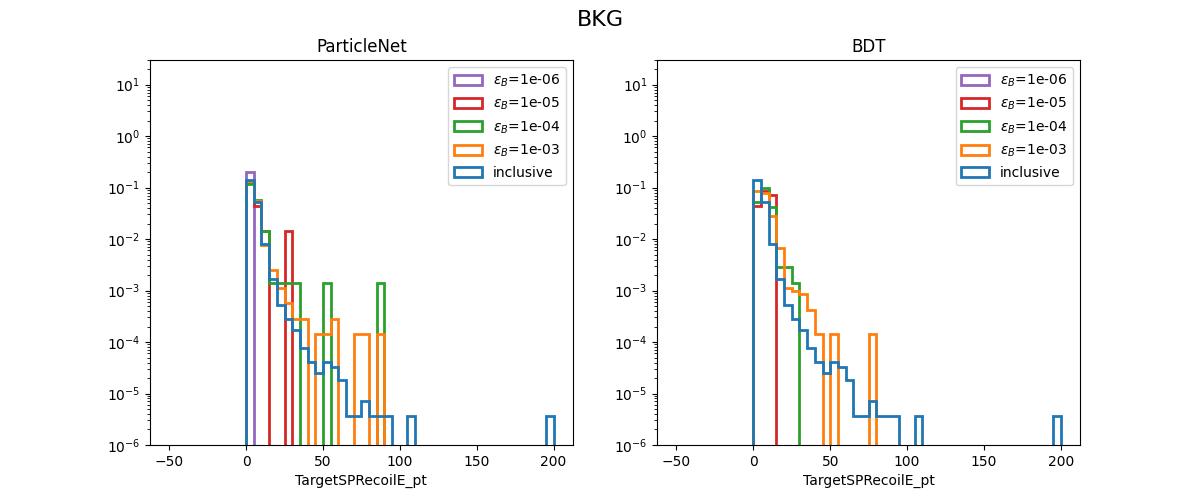

ParticleNet_disc [-99, 0.6467264, 0.8669618, 0.9301148, 0.98309165]
(54746, 1)
(54746, 1)
(54746, 1)
(54746, 1)
(54746, 1)
discValue_ [-99, 0.9961104989051819, 0.9998999834060669, 0.999968409538269, 0.9999867677688599]
(54746, 1)
(54746, 1)
(54746, 1)
(54746, 1)
(54746, 1)


/home/pmasterson/miniconda3/envs/torchroot/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<IPython.core.display.Javascript object>


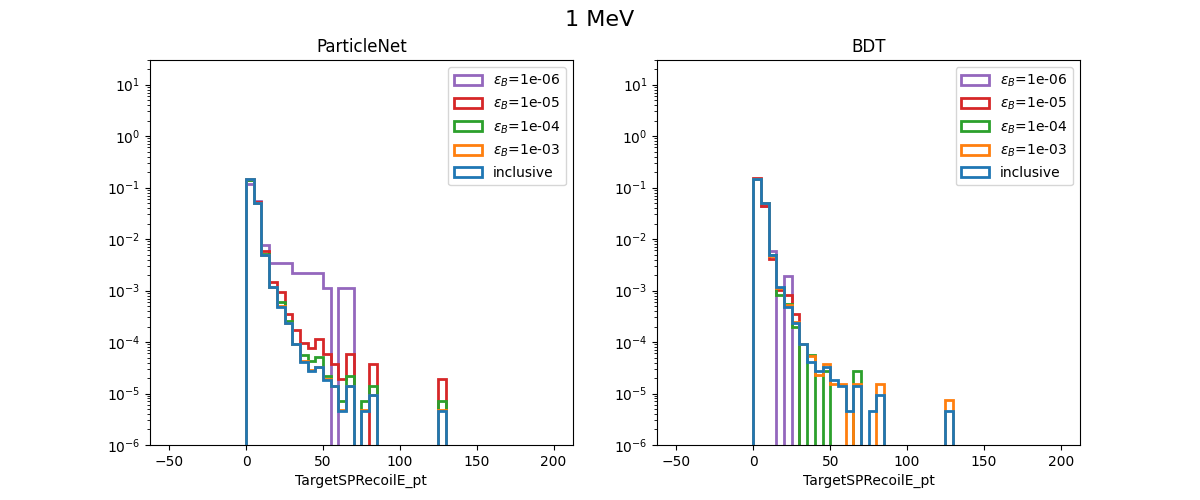

ParticleNet_disc [-99, 0.6467264, 0.8669618, 0.9301148, 0.98309165]
(43388, 1)
(43388, 1)
(43388, 1)
(43388, 1)
(43388, 1)
discValue_ [-99, 0.9961104989051819, 0.9998999834060669, 0.999968409538269, 0.9999867677688599]
(43388, 1)
(43388, 1)
(43388, 1)
(43388, 1)
(43388, 1)


<IPython.core.display.Javascript object>


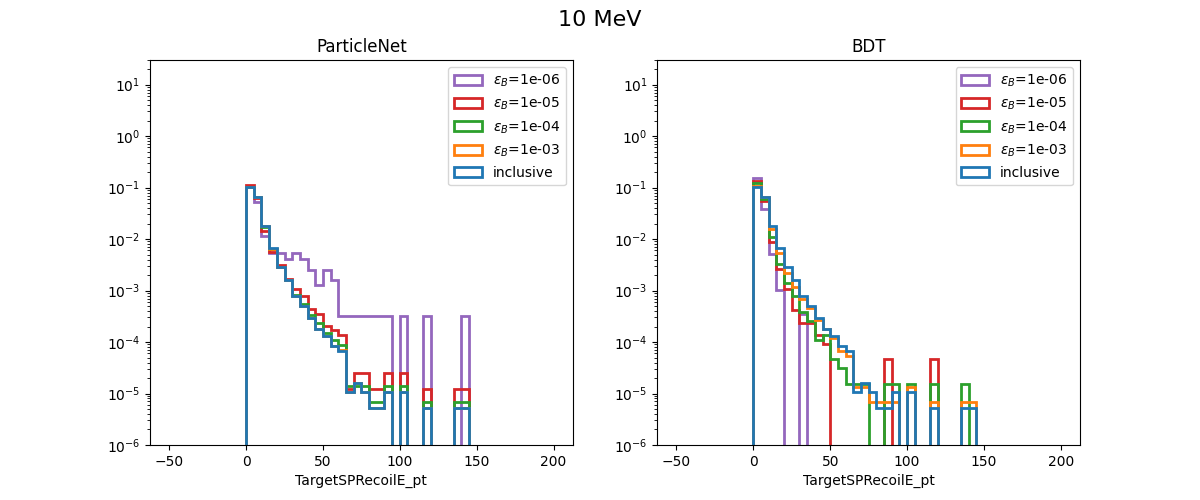

ParticleNet_disc [-99, 0.6467264, 0.8669618, 0.9301148, 0.98309165]
(38194, 1)
(38194, 1)
(38194, 1)
(38194, 1)
(38194, 1)
discValue_ [-99, 0.9961104989051819, 0.9998999834060669, 0.999968409538269, 0.9999867677688599]
(38194, 1)
(38194, 1)
(38194, 1)
(38194, 1)
(38194, 1)


<IPython.core.display.Javascript object>


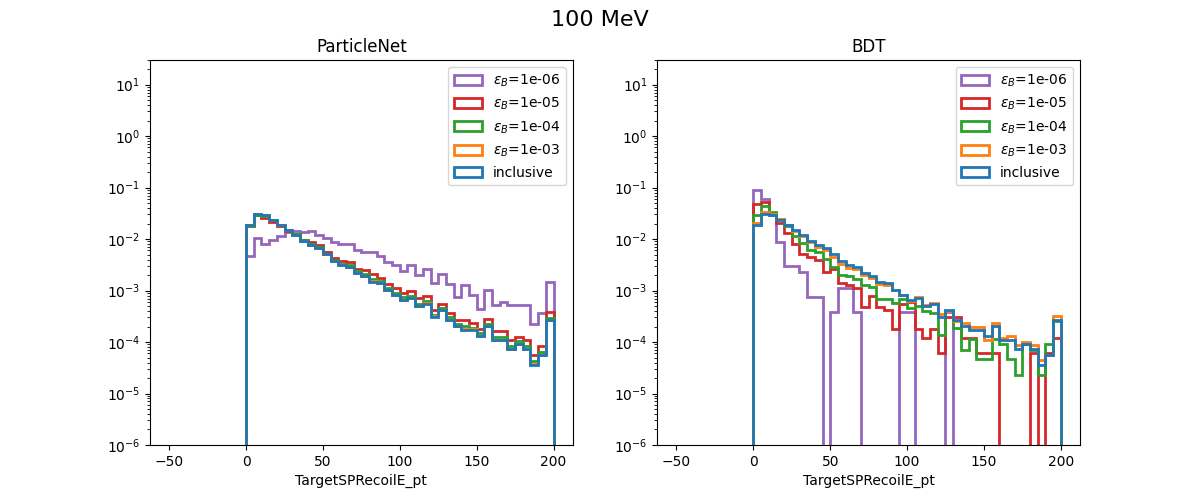

ParticleNet_disc [-99, 0.6467264, 0.8669618, 0.9301148, 0.98309165]
(21874, 1)
(21874, 1)
(21874, 1)
(21874, 1)
(21874, 1)
discValue_ [-99, 0.9961104989051819, 0.9998999834060669, 0.999968409538269, 0.9999867677688599]
(21874, 1)
(21874, 1)
(21874, 1)
(21874, 1)
(21874, 1)


<IPython.core.display.Javascript object>


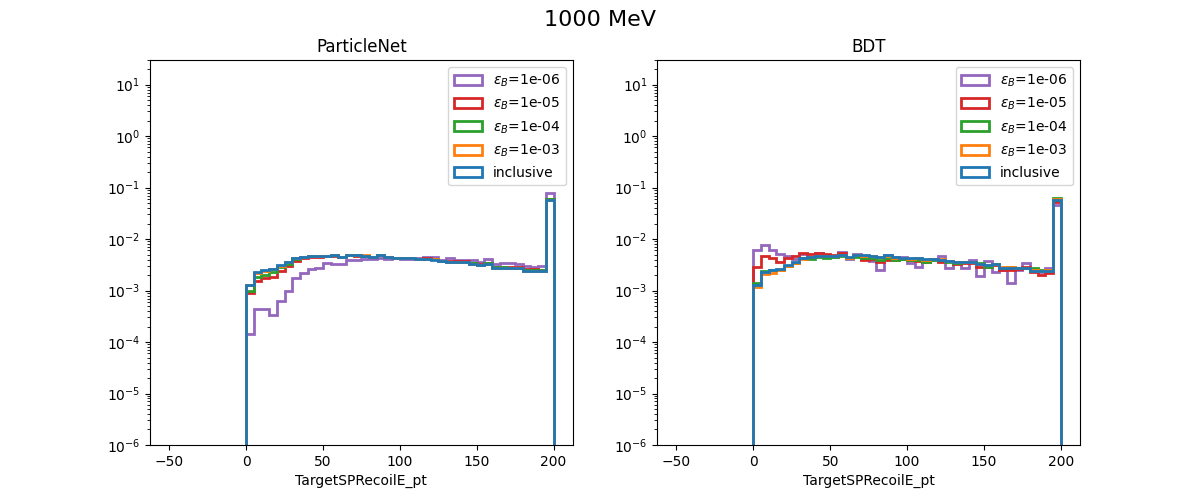

ParticleNet_disc [-99, 0.6467264, 0.8669618, 0.9301148, 0.98309165]
(47252, 1)
(47252, 1)
(47252, 1)
(47252, 1)
(47252, 1)
discValue_ [-99, 0.9961104989051819, 0.9998999834060669, 0.999968409538269, 0.9999867677688599]
(47252, 1)
(47252, 1)
(47252, 1)
(47252, 1)
(47252, 1)


In [69]:
# compare shapes with succesively tighter selections
# keep SIG efficiency the same for all signal points

for var in plot_bins:
    print(var)
    plot_trend(var, proc=0)
    plot_trend(var, proc=1)
    plot_trend(var, proc=10)
    plot_trend(var, proc=100)
    plot_trend(var, proc=1000)
    
# All:  pT bias still visible in 10MeV
# SP hit:  pT bias mostly gone
# No SP hit:  no pT bias, as usual

In [172]:
# NEW RATIO PLOTS:
# Plot the above histogram results, except as fractions:  bin height / incl bin height for each efficiency.
colors_new = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

def plot_trend_ratio(var_name, proc, eff_levels=None, mistag_levels=[1e-3, 1e-4, 1e-5, 1e-6]):
    if ':' in var_name:
        var, var_idx = var_name.split(':')
        var_idx = int(var_idx)
    else:
        var, var_idx = var_name, None
    if eff_levels is None and mistag_levels is None:
        eff_levels = [1e-3, 1e-4, 1e-5, 1e-6] if proc==0 else [0.9, 0.7, 0.5, 0.2]
    f, axes = plt.subplots(1, 2, figsize=(12, 2))
    #f.suptitle('%d MeV'%proc if proc>0 else 'BKG', fontsize=16)
    pos0 = test_extra_labels==proc
    #a_tmp = {k:a[k][pos0] for k in ('ParticleNet_disc', 'EcalVetoGabriel_recon.discValue_', var)}
    # TESTING CONVERSION:
    a_tmp = {k:np.array(a[k][pos0]) for k in ('ParticleNet_disc', 'discValue_', var)}
    if var_idx:
        a_tmp[var] = a_tmp[var][:, var_idx]
    # NEW:  Ratio plot testing
    ratio_arrs = []  # PN_disc, ECal.disc
    for i, k in enumerate(['ParticleNet_disc', 'discValue_']):
        arrs = []
        labels = []
        scores = a_tmp[k]
        if mistag_levels is None:  #NOTE:  Currently modifying this to produce fixed bkg efficiencies...
            #Changing presel_eff[proc] to 1 (Warning:  bkg will be messed up)
            pcts = (1 - np.array(eff_levels)/presel_eff[1]) * 100.
            print('effs=', pcts)
            thresholds = [-99] + list(np.percentile(scores, pcts))
        else:
            thresholds = [-99] + [info[-1] for info in roc_info[1]['SplitNet' if i==0 else 'BDT']]
        print(k, thresholds)
        # NEW:  Ratio plot
        for idx, thres in enumerate(thresholds):
            pos = scores>thres
#             print(k, thres, pos.sum())
            if not isinstance(plot_bins[var_name], int):
                arrs.append(np.clip(a_tmp[var][pos], min(plot_bins[var_name]), max(plot_bins[var_name])))
            else:
                arrs.append(a_tmp[var][pos])
            if mistag_levels is None:
                labels.append('inclusive' if idx==0 else ('$\epsilon_{B}$=%.0e'%eff_levels[idx-1] if proc==0 else '$\epsilon_{S}$=%.1f'%eff_levels[idx-1]))
            else:
                labels.append('inclusive' if idx==0 else '$\epsilon_{B}$=%.0e'%mistag_levels[idx-1])
        
        inclusive_index = labels.index('inclusive')
        inclusive_arr = arrs[inclusive_index]
        inclusive_hist,     edges = np.histogram(inclusive_arr, bins=plot_bins[var_name], density=True)
        inclusive_num_hist, edges = np.histogram(inclusive_arr, bins=plot_bins[var_name])
        inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
        new_labels = []
        ratio_arrs = []
        plt_edges = []
        yerrs = []
        print("inclusive hist shape is", inclusive_hist.shape)
        for l, arr in zip(labels, arrs):
            if l =='inclusive':  continue
            new_hist, edges     = np.histogram(arr, bins=plot_bins[var_name], density=True)
            new_num_hist, edges = np.histogram(arr, bins=plot_bins[var_name])
            bin_errs = [1/np.sqrt(n) for n in new_num_hist]
            ratio_arr = [new_hist[j] / inclusive_hist[j] for j in range(len(new_hist))]  #new_hist / inclusive_hist  # Should perform element-wise division
            frac_errs = [np.sqrt(bin_errs[n]**2 + inclusive_frac_errs[n]**2) for n in range(len(bin_errs))]

            for r in range(len(ratio_arr)):
                if np.isnan(ratio_arr[r]):  ratio_arr[r] = 0
            #print(ratio_arr)
            ratio_arrs.append(ratio_arr)
            yerrs.append(frac_errs)
            plt_edges.append(edges[:-1])
            new_labels.append(l)
        
        # NEW:
        #histo_list = []
        #for arr in arrs:
        #    histo = np.histogram(arr, bins=plot_bins[var_name], density=True)
        #print(plt_edges[0], ratio_arrs[0])
        #print(new_labels, colors[:-1])
        for j in range(len(ratio_arrs)):
            axes[i].errorbar(plt_edges[j], ratio_arrs[j], yerr=yerrs[j], fmt='o', label=new_labels[j], color=colors_new[j], linewidth=2)
        #axes[i].set_title('ParticleNet' if i==0 else 'BDT')  #, '+str(proc if proc>0 else 'BKG')+' MeV
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("events / inclusive")
        axes[i].set_ylim(0, 3)
        axes[i].legend(loc='best')
        

SIG EFFICIENCY PLOTS:
TargetSPRecoilE_pt


<IPython.core.display.Javascript object>


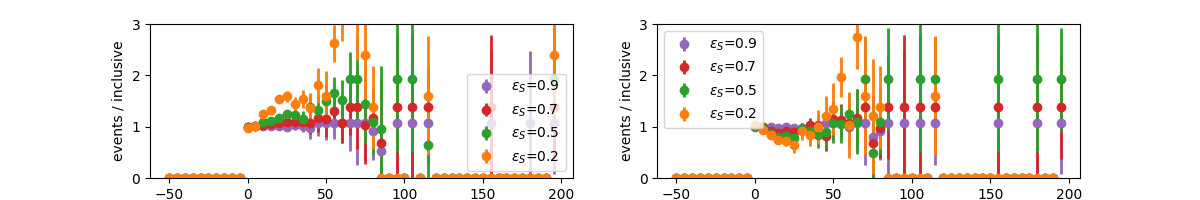

effs= [ 6.46435253 27.25005196 48.0357514  79.21430056]
ParticleNet_disc [-99, 0.7822250455240033, 0.9003567402735988, 0.9416919050804421, 0.9824017325078988]
inclusive hist shape is (50,)
effs= [ 6.46435253 27.25005196 48.0357514  79.21430056]
discValue_ [-99, 0.0003218650817871094, 0.0021435166936583823, 0.012646999584119498, 0.3983714361494082]
inclusive hist shape is (50,)


<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclusive_hist[j] for j in range(len(new_hist))]  #new_hist / inclusive_hist  # Should perform element-wise division
<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclu

<IPython.core.display.Javascript object>


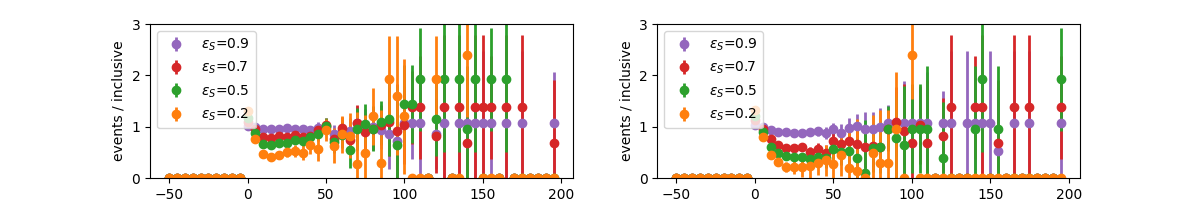

effs= [ 6.46435253 27.25005196 48.0357514  79.21430056]
ParticleNet_disc [-99, 0.8464215093059416, 0.9411719962009841, 0.9741331156388907, 0.9955297697732711]
inclusive hist shape is (50,)
effs= [ 6.46435253 27.25005196 48.0357514  79.21430056]
discValue_ [-99, 0.0009751319885253906, 0.032462185979310706, 0.3782415507464666, 0.9848458897891547]
inclusive hist shape is (50,)


<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclusive_hist[j] for j in range(len(new_hist))]  #new_hist / inclusive_hist  # Should perform element-wise division
<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclu

<IPython.core.display.Javascript object>


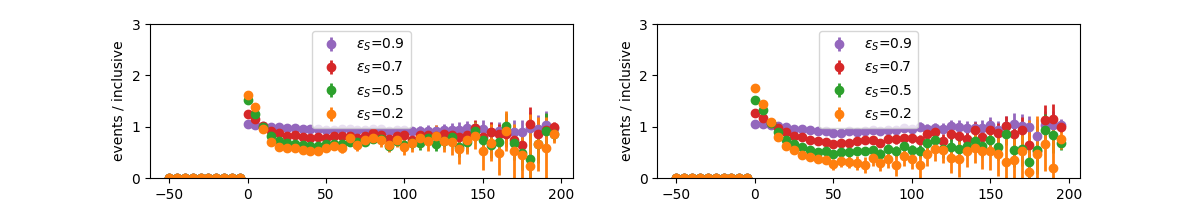

effs= [ 6.46435253 27.25005196 48.0357514  79.21430056]
ParticleNet_disc [-99, 0.886082171737169, 0.9697465763422091, 0.9895982139201255, 0.99733966588974]
inclusive hist shape is (50,)
effs= [ 6.46435253 27.25005196 48.0357514  79.21430056]
discValue_ [-99, 0.004187290434578652, 0.170610266523732, 0.786467568365409, 0.9919077380856712]
inclusive hist shape is (50,)


<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclusive_hist[j] for j in range(len(new_hist))]  #new_hist / inclusive_hist  # Should perform element-wise division
<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclu

<IPython.core.display.Javascript object>


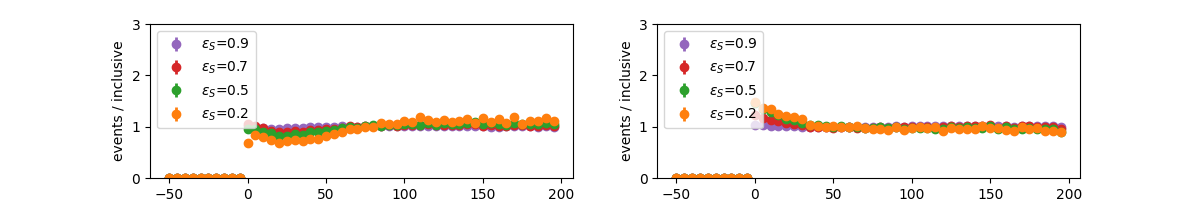

effs= [ 6.46435253 27.25005196 48.0357514  79.21430056]
ParticleNet_disc [-99, 0.968643760735665, 0.9930142760276794, 0.9965020789101029, 0.998941957950592]
inclusive hist shape is (50,)
effs= [ 6.46435253 27.25005196 48.0357514  79.21430056]
discValue_ [-99, 0.05084351544517956, 0.6366242006052512, 0.9468779100917823, 0.995031633909317]
inclusive hist shape is (50,)
BKG EFFICIENCY PLOTS:
TargetSPRecoilE_pt


<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclusive_hist[j] for j in range(len(new_hist))]  #new_hist / inclusive_hist  # Should perform element-wise division
<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclu

<IPython.core.display.Javascript object>


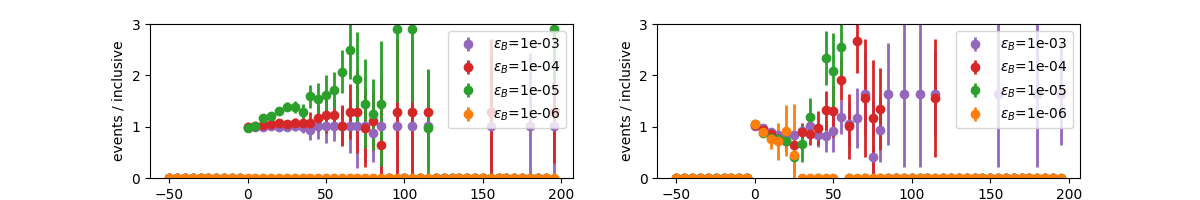

ParticleNet_disc [-99, 0.65423256, 0.88713664, 0.9663165, 1.0]
inclusive hist shape is (50,)
discValue_ [-99, 0.005839824676513672, 0.3734763264656067, 0.9845847487449646, 0.9995251893997192]
inclusive hist shape is (50,)


<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclusive_hist[j] for j in range(len(new_hist))]  #new_hist / inclusive_hist  # Should perform element-wise division
/home/pmasterson/miniconda3/envs/torchroot/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/pmasterson/miniconda3/envs/torchroot/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-172-8b3ba1531515>:52: RuntimeWar

<IPython.core.display.Javascript object>


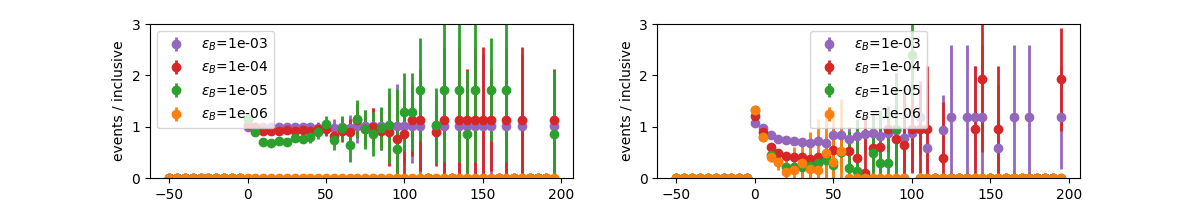

ParticleNet_disc [-99, 0.65423256, 0.88713664, 0.9663165, 1.0]
inclusive hist shape is (50,)
discValue_ [-99, 0.005839824676513672, 0.3734763264656067, 0.9845847487449646, 0.9995251893997192]
inclusive hist shape is (50,)


<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclusive_hist[j] for j in range(len(new_hist))]  #new_hist / inclusive_hist  # Should perform element-wise division
/home/pmasterson/miniconda3/envs/torchroot/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/pmasterson/miniconda3/envs/torchroot/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-172-8b3ba1531515>:52: RuntimeWar

<IPython.core.display.Javascript object>


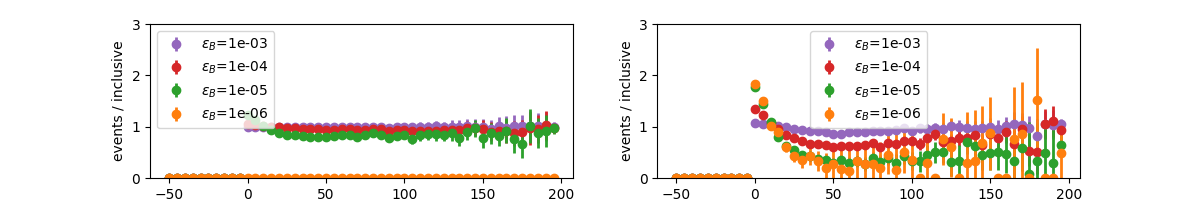

ParticleNet_disc [-99, 0.65423256, 0.88713664, 0.9663165, 1.0]


<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclusive_hist[j] for j in range(len(new_hist))]  #new_hist / inclusive_hist  # Should perform element-wise division


inclusive hist shape is (50,)
discValue_ [-99, 0.005839824676513672, 0.3734763264656067, 0.9845847487449646, 0.9995251893997192]
inclusive hist shape is (50,)


/home/pmasterson/miniconda3/envs/torchroot/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/pmasterson/miniconda3/envs/torchroot/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclusive_hist[j] for j in range(len(new_hist))]  #new_hist / inclusive_hist  # Should perform element-wise division


<IPython.core.display.Javascript object>


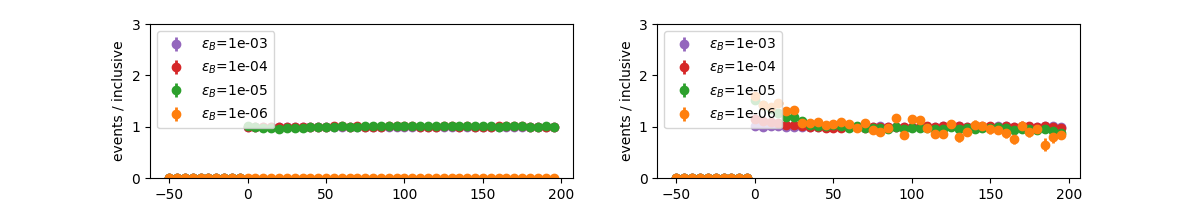

ParticleNet_disc [-99, 0.65423256, 0.88713664, 0.9663165, 1.0]
inclusive hist shape is (50,)


<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclusive_hist[j] for j in range(len(new_hist))]  #new_hist / inclusive_hist  # Should perform element-wise division


discValue_ [-99, 0.005839824676513672, 0.3734763264656067, 0.9845847487449646, 0.9995251893997192]
inclusive hist shape is (50,)


/home/pmasterson/miniconda3/envs/torchroot/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/pmasterson/miniconda3/envs/torchroot/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-172-8b3ba1531515>:52: RuntimeWarning: divide by zero encountered in double_scalars
  inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
<ipython-input-172-8b3ba1531515>:62: RuntimeWarning: divide by zero encountered in double_scalars
  bin_errs = [1/np.sqrt(n) for n in new_num_hist]
<ipython-input-172-8b3ba1531515>:63: RuntimeWarning: invalid value encountered in double_scalars
  ratio_arr = [new_hist[j] / inclusive_hist[j] for j in range(len(new_hist))]  #new_hist / inclusive_hist  # Should perform element-wise division


In [173]:
print("SIG EFFICIENCY PLOTS:")

for var in plot_bins:
    print(var)
    #plot_trend_ratio(var, proc=0, mistag_levels=None)
    plot_trend_ratio(var, proc=1, mistag_levels=None)
    plot_trend_ratio(var, proc=10, mistag_levels=None)
    plot_trend_ratio(var, proc=100, mistag_levels=None)
    plot_trend_ratio(var, proc=1000, mistag_levels=None)

print("BKG EFFICIENCY PLOTS:")

for var in plot_bins:
    print(var)
    #plot_trend_ratio(var, proc=0)
    plot_trend_ratio(var, proc=1)
    plot_trend_ratio(var, proc=10)
    plot_trend_ratio(var, proc=100)
    plot_trend_ratio(var, proc=1000)

In [153]:
# ***TEMP:***  For looking at distr of high-PN-score events

# Look at semi-ROC curve for BDT, PN...try 1 MeV.
# First, get PN, BDT scores for sig, bkg
#print(set(a['ParticleNet_extra_label']))  # {0.0, 1.0, 100.0, 1000.0, 10.0}
sig_filter = np.array(a['ParticleNet_extra_label'] == 1)
bkg_filter = np.array(a['ParticleNet_extra_label'] == 0)
PN_filter = np.array(a['ParticleNet_disc'] > 0)  # Added--too slow otherwise, only care about high scores
DV_filter = np.array(a['EcalVeto_v12.discValue_'] > 0)
PN_sig = a['ParticleNet_disc'][sig_filter*PN_filter]
PN_bkg = a['ParticleNet_disc'][bkg_filter*PN_filter]
DV_sig = a['EcalVeto_v12.discValue_'][sig_filter*DV_filter]
DV_bkg = a['EcalVeto_v12.discValue_'][bkg_filter*DV_filter]

cuts = 1 - np.logspace(-3, -6, 100)
print("Generating cut arrays:  siglen={}, bkglen={}".format(len(PN_sig), len(PN_bkg)))
print("Generating DV cut arrays:  siglen={}, bkglen={}".format(len(DV_sig), len(DV_bkg)))

PN_sigpass = np.array([sum(PN_sig > c) for c in cuts]) / len(PN_sig)
print("Finished first sig")
PN_bkgpass = np.array([sum(PN_bkg > c) for c in cuts]) / len(PN_bkg)
print("Finished PN")
DV_sigpass = np.array([sum(DV_sig > c) for c in cuts]) / len(DV_sig)
print("Finished DV sig")
DV_bkgpass = np.array([sum(DV_bkg > c) for c in cuts]) / len(DV_bkg)
print("Done")

KeyError: 'EcalVeto_v12.discValue_'

<IPython.core.display.Javascript object>


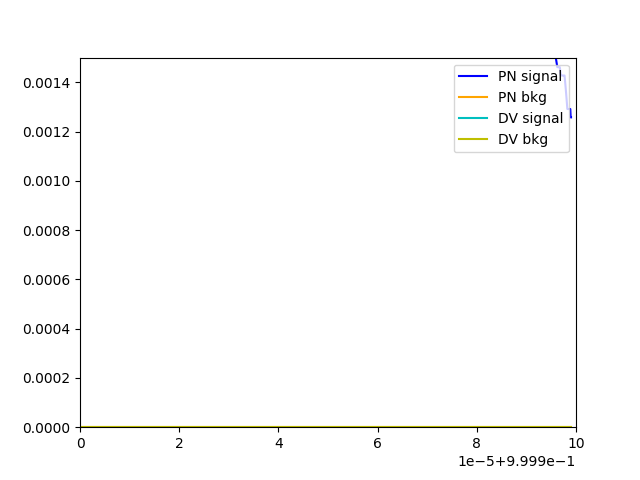

In [30]:
plt.figure()
plt.plot(cuts, PN_sigpass, color='b', label="PN signal")
plt.plot(cuts, PN_bkgpass, color='orange', label="PN bkg")
plt.plot(cuts, DV_sigpass, color='c', label="DV signal")
plt.plot(cuts, DV_bkgpass, color='y', label="DV bkg")
plt.legend(loc=1)
plt.xlim((0.9999, 1))
plt.ylim((0, 0.0015))
plt.show()

In [29]:
bins = np.linspace(0.999, 1, 50)
#plt.figure()
#plt.hist(PN_sig, bins=bins, histtype='step')
#plt.hist(PN_bkg, bins=bins, histtype='step')
#plt.show()
print("Starting")
for p in range(len(PN_bkg)):
    if PN_bkg[p] > 0.999:  print(PN_bkg[p], DV_bkg[p])
print("Completed")
# For PN double:  6 1.0s, 3-4 @ min precision

Starting
Completed
